In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
import os

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

seed = 1
# # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("clean_train.csv")

df.head()

,ADDRESS,OPCODE,CATEGORY
0,0x219f4ee903f78e78773e5d1e3520cfd507485bc6,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
1,0x560ed796aa8d23411b94b9d047ecdda39d4fcdeb,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
2,0xe726f97ff3c63dd71c1520c102adc39d1a2693ea,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
3,0x8ebac490495958b3804bb079e259340f0f53b69c,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0
4,0x190700d69031db6b072a30577f9b3dbc53a320a1,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0


In [3]:
def label(df):
    # label data
    df['LABEL'] = 0
    df.loc[df['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
    df.loc[df['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
    df.loc[df['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
    df.loc[df['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
    df.loc[df['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4


def preprocess(df):
    n_most_common_words = 1600
    max_len = 100  #the length of opcode

    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=n_most_common_words, lower=False)

    # tokenizer.fit_on_texts(increased_vul['OPCODE'].values)
    tokenizer.fit_on_texts(df['OPCODE'].values)
    sequences = tokenizer.texts_to_sequences(df['OPCODE'].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))
    X = tf.keras.utils.pad_sequences(sequences, maxlen=max_len)
    return X


def dftoXY(df):
    X_test = preprocess(df)
    label(df)
    print(pd.value_counts(df['LABEL']))
    y_test = tf.keras.utils.to_categorical(df['LABEL'], num_classes=5)
    return X_test, y_test


def XandY(sp_df, g_df, p_df, s_df, n_df):
    dfset = pd.concat([sp_df, g_df, p_df, s_df, n_df])
    dfset = dfset.sample(frac=1, random_state=39, replace=False)

    dfset['LABEL'] = 0

    dfset.loc[dfset['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
    dfset.loc[dfset['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
    dfset.loc[dfset['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
    dfset.loc[dfset['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
    dfset.loc[dfset['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

    X, y = dftoXY(dfset)

    print('Shape of X: {}'.format(X.shape))

    y_labels = np.expand_dims(np.array(np.argmax(y, axis=1)), axis=1)
    print('Shape of y: {}'.format(y_labels.shape))

    return X, y_labels

In [4]:
data = df
pd.value_counts(data['CATEGORY'])

1 0 0 0    884273
0 0 0 1      5801
0 0 1 0      1461
0 1 0 0      1207
0 1 1 0       171
Name: CATEGORY, dtype: int64

In [5]:
data_plots = data
data_plots = data_plots.replace({'CATEGORY': {'1 0 0 0': 'normal', '0 1 0 0': 'suicidal', '0 0 1 0': 'prodigal',
                                              '0 0 0 1': 'greedy', '0 1 1 0': 'suicidal and prodigal'}})
data_plots.head()

,ADDRESS,OPCODE,CATEGORY
0,0x219f4ee903f78e78773e5d1e3520cfd507485bc6,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,normal
1,0x560ed796aa8d23411b94b9d047ecdda39d4fcdeb,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,normal
2,0xe726f97ff3c63dd71c1520c102adc39d1a2693ea,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,normal
3,0x8ebac490495958b3804bb079e259340f0f53b69c,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,normal
4,0x190700d69031db6b072a30577f9b3dbc53a320a1,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,normal


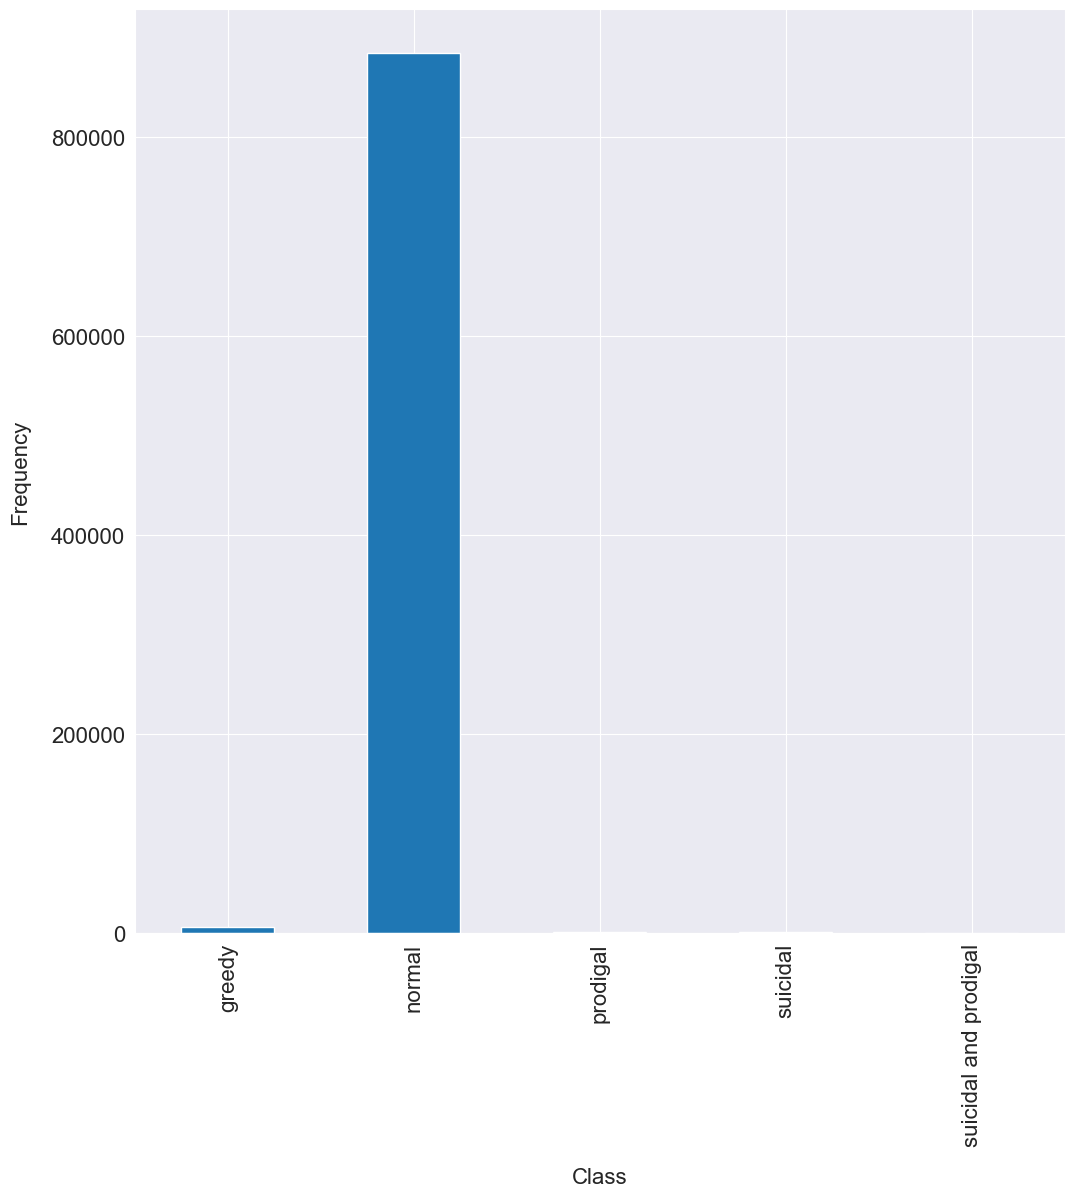

In [6]:
fig = plt.figure(figsize=(12, 12))
count_classes = pd.value_counts(data_plots['CATEGORY'], sort=True).sort_index()
count_classes.plot(kind='bar')
# plt.title("Vulnerability Class Histogram")
plt.xlabel("Class", fontsize=16, labelpad=15)
plt.ylabel("Frequency", fontsize=16, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('outputs/vulnerability_class_hist.pdf', bbox_inches='tight')
plt.show()

In [7]:
shuffled = data

# shuffled = data
n = shuffled[shuffled['CATEGORY'] == '1 0 0 0']  # no vulnerabilities
s = shuffled[shuffled['CATEGORY'] == '0 1 0 0']  # suicidal
p = shuffled[shuffled['CATEGORY'] == '0 0 1 0']  # prodigal
g = shuffled[shuffled['CATEGORY'] == '0 0 0 1']  # greedy
sp = shuffled[shuffled['CATEGORY'] == '0 1 1 0']  # suicidal and prodigal

In [8]:
proportion_train = 0.7
proportion_val = 0.1
proportion_test = 0.2

#n
n_shuf = n.sample(frac=1, random_state=39, replace=False)
# set number of samples in each set
num_n_train = 10000
num_n_val = round(((num_n_train) / proportion_train) * proportion_val)
num_n_test = round(((num_n_train) / proportion_train) * proportion_test)
n_train = n_shuf.iloc[0:num_n_train]
n_val = n_shuf.iloc[num_n_train:(num_n_train + num_n_val)]
n_test = n_shuf.iloc[(num_n_train + num_n_val):(num_n_train + num_n_val + num_n_test)]

#s
s_shuf = s.sample(frac=1, random_state=39, replace=False)
num_s_train = round(len(s_shuf) * proportion_train)
num_s_val = round(len(s_shuf) * proportion_val)
s_train = s_shuf.iloc[0:num_s_train]
s_val = s_shuf.iloc[num_s_train:(num_s_train + num_s_val)]
s_test = s_shuf.iloc[(num_s_train + num_s_val):]

#p
p_shuf = p.sample(frac=1, random_state=39, replace=False)
num_p_train = round(len(p_shuf) * proportion_train)
num_p_val = round(len(p_shuf) * proportion_val)
p_train = p_shuf.iloc[0:num_p_train]
p_val = p_shuf.iloc[num_p_train:(num_p_train + num_p_val)]
p_test = p_shuf.iloc[(num_p_train + num_p_val):]

#g
g_shuf = g.sample(frac=1, random_state=39, replace=False)
num_g_train = round(len(g_shuf) * proportion_train)
num_g_val = round(len(g_shuf) * proportion_val)
g_train = g_shuf.iloc[0:num_g_train]
g_val = g_shuf.iloc[num_g_train:(num_g_train + num_g_val)]
g_test = g_shuf.iloc[(num_g_train + num_g_val):]

#sp
sp_shuf = sp.sample(frac=1, random_state=39, replace=False)
num_sp_train = round(len(sp_shuf) * proportion_train)
num_sp_val = round(len(sp_shuf) * proportion_val)
sp_train = sp_shuf.iloc[0:num_sp_train]
sp_val = sp_shuf.iloc[num_sp_train:(num_sp_train + num_sp_val)]
sp_test = sp_shuf.iloc[(num_sp_train + num_sp_val):]

In [9]:
#====train set
df_train = pd.concat([sp_train, n_train, g_train, p_train, s_train])
df_train = df_train.sample(frac=1, random_state=39, replace=False)
df_train['LABEL'] = 0

df_train['LABEL'] = 0

#One-hot encode the lab
df_train.loc[df_train['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_train.loc[df_train['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_train.loc[df_train['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_train.loc[df_train['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_train.loc[df_train['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

X_train, y_train = dftoXY(df_train)
df_train

Found 150 unique tokens.
0    10000
3     4061
2     1023
1      845
4      120
Name: LABEL, dtype: int64


,ADDRESS,OPCODE,CATEGORY,LABEL
715961,0x47de7ffe3326563d3fa6b62ea80cfcc3994b384e,60 60 52 60 35 7c 90 04 80 63 14 61 57 80 63 1...,0 0 0 1,3
448833,0x3d4329d6fc242db50bb615f761205c2ee9d736dd,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0,0
614956,0xcf561870a989d3a91d4e7a4d737c9a2ed743a918,60 60 52 60 60 0a 60 35 04 63 81 14 60 57 5b 6...,1 0 0 0,0
435752,0x88b377f0a074e61fbf2e1ed87e96b1ac861dca69,60 60 52 36 15 60 57 60 56 5b 60 5b 5b 56 5b 00,0 0 0 1,3
489795,0xd949e0532ead676a75ab3745b8567f2736bc61ab,60 60 52 60 60 0a 60 35 04 63 81 14 60 57 5b 6...,1 0 0 0,0
...,...,...,...,...
743404,0x86d12281c3afe53ea62b4156d883673b29b62074,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0,0
821450,0xd5ec1fb9571933913f4928e3e0a44127115742aa,60 60 52 63 7c 60 35 04 16 63 81 14 61 57 80 6...,1 0 0 0,0
35612,0xa9c5e05701211f5e93dba45f51636fdf338b083e,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0,0
169135,0x504b30409026002780a587d481b85aaae05339c9,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,1 0 0 0,0


In [10]:
#====train set
df_train = pd.concat([sp_train, n_train, g_train, p_train, s_train])
df_train = df_train.sample(frac=1, random_state=39, replace=False)
df_train['LABEL'] = 0

#One-hot encoding
df_train.loc[df_train['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_train.loc[df_train['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_train.loc[df_train['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_train.loc[df_train['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_train.loc[df_train['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

X_train, y_train = dftoXY(df_train)

print('Shape of X: {}'.format(X_train.shape))

# for sm.fit_sample
ytrain_labels = np.expand_dims(np.array(np.argmax(y_train, axis=1)), axis=1)
print('Shape of y: {}'.format(ytrain_labels.shape))

# ============ validation set ============
df_val = pd.concat([sp_val, n_val, g_val, p_val, s_val])
df_val = df_val.sample(frac=1, random_state=39, replace=False)

df_val['LABEL'] = 0

#One-hot encoding
df_val.loc[df_val['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_val.loc[df_val['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_val.loc[df_val['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_val.loc[df_val['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_val.loc[df_val['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

X_val, y_val = dftoXY(df_val)

print('Shape of X: {}'.format(X_val.shape))

# for sm.fit_sample
yval_labels = np.expand_dims(np.array(np.argmax(y_val, axis=1)), axis=1)
print('Shape of y: {}'.format(yval_labels.shape))

# ============ test set ============
df_test = pd.concat([sp_test, n_test, g_test, p_test, s_test])
df_test = df_test.sample(frac=1, random_state=39, replace=False)

df_test['LABEL'] = 0

#One-hot encoding
df_test.loc[df_test['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_test.loc[df_test['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_test.loc[df_test['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_test.loc[df_test['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_test.loc[df_test['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

# df_train.head()

X_test, y_test = dftoXY(df_test)

print('Shape of X: {}'.format(X_test.shape))

# for sm.fit_sample
ytest_labels = np.expand_dims(np.array(np.argmax(y_test, axis=1)), axis=1)
print('Shape of y: {}'.format(ytest_labels.shape))


Found 150 unique tokens.
0    10000
3     4061
2     1023
1      845
4      120
Name: LABEL, dtype: int64
Shape of X: (16049, 100)
Shape of y: (16049, 1)
Found 150 unique tokens.
0    1429
3     580
2     146
1     121
4      17
Name: LABEL, dtype: int64
Shape of X: (2293, 100)
Shape of y: (2293, 1)
Found 150 unique tokens.
0    2857
3    1160
2     292
1     241
4      34
Name: LABEL, dtype: int64
Shape of X: (4584, 100)
Shape of y: (4584, 1)


In [11]:
# train set
X_train, ytrain_labels = XandY(sp_train, n_train, g_train, p_train, s_train)
# validation set
X_val, yval_labels = XandY(sp_val, n_val, g_val, p_val, s_val)
# test set
X_test, ytest_labels = XandY(sp_test, n_test, g_test, p_test, s_test)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=17)
X_train_res, y_train_res = sm.fit_resample(X_train, ytrain_labels.ravel())
X_val_res, y_val_res = sm.fit_resample(X_val, yval_labels.ravel())
X_test_res, y_test_res = sm.fit_resample(X_test, ytest_labels.ravel())

Found 150 unique tokens.
0    10000
3     4061
2     1023
1      845
4      120
Name: LABEL, dtype: int64
Shape of X: (16049, 100)
Shape of y: (16049, 1)
Found 150 unique tokens.
0    1429
3     580
2     146
1     121
4      17
Name: LABEL, dtype: int64
Shape of X: (2293, 100)
Shape of y: (2293, 1)
Found 150 unique tokens.
0    2857
3    1160
2     292
1     241
4      34
Name: LABEL, dtype: int64
Shape of X: (4584, 100)
Shape of y: (4584, 1)


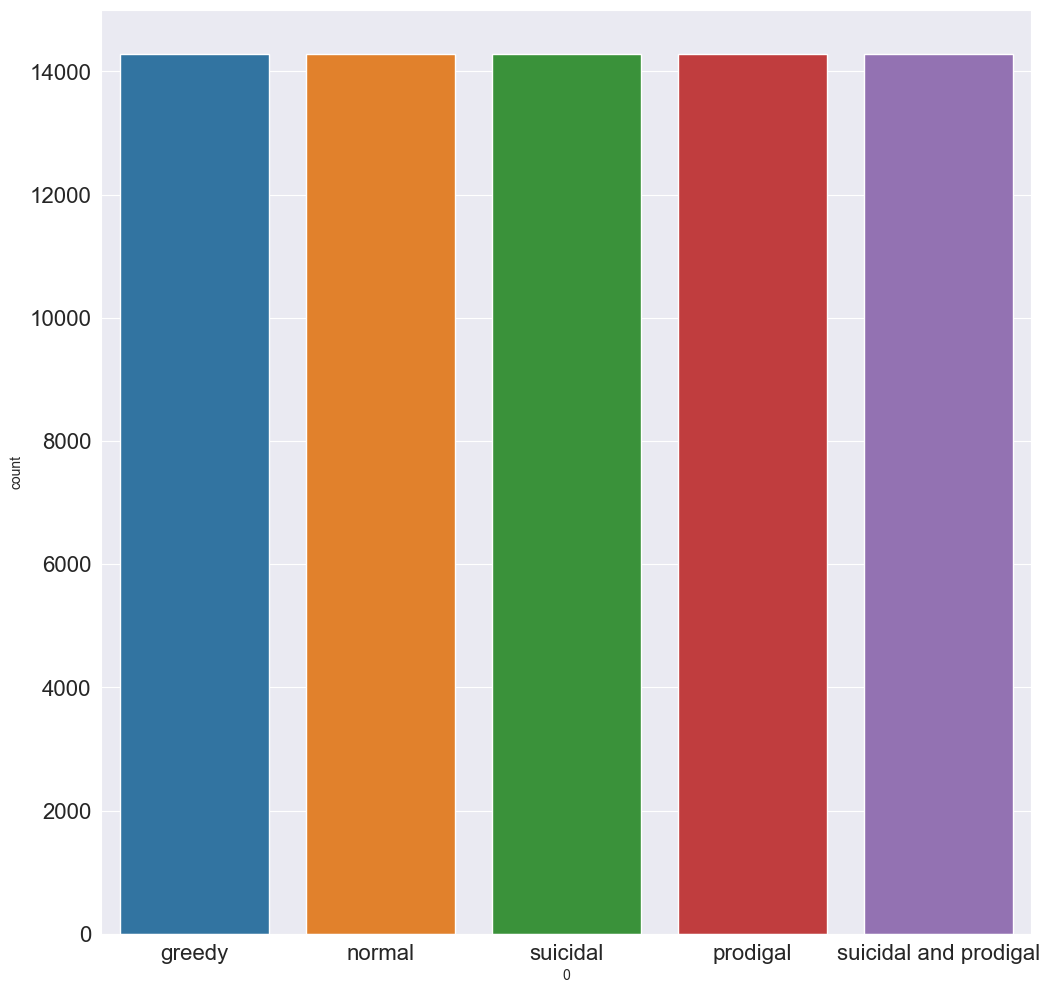

In [12]:
font_size = 20
entire_dataset = np.concatenate((y_train_res, y_val_res, y_test_res))
entire_dataset = pd.DataFrame(entire_dataset)

entire_dataset = entire_dataset.replace(
    {0: 'normal', 1: 'suicidal', 2: 'prodigal', 3: 'greedy', 4: 'suicidal and prodigal'})

plt.figure(figsize=(12, 12))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.countplot(x=0, data=entire_dataset)

plt.savefig('outputs/class_resample.pdf', bbox_inches='tight')

In [13]:
df = pd.DataFrame(np.concatenate([X_train_res, X_val_res, X_test_res]))
y = pd.DataFrame(np.concatenate([y_train_res, y_val_res, y_test_res]))
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [14]:
print(f"Train size: {df_train.shape}, test size: {df_test.shape}")

Train size: (50001, 100), test size: (21429, 100)


In [15]:
def accuracies(y_pred, y_test):
    y_test = y_test.reset_index(drop=True)

    normal_correct = 0
    suicidal_correct = 0
    prodigal_correct = 0
    greedy_correct = 0
    suicidal_prodigal_correct = 0

    normal_quantity = 0
    suicidal_quantity = 0
    prodigal_quantity = 0
    greedy_quantity = 0
    suicidal_prodigal_quantity = 0
    false_negative = 0

    for i in range(0, len(y_test)):
        if y_pred[i] == y_test[0][i] and y_test[0][i] == 0:
            normal_correct = normal_correct + 1
        if y_pred[i] == y_test[0][i] and y_test[0][i] == 1:
            suicidal_correct = suicidal_correct + 1
        if y_pred[i] == y_test[0][i] and y_test[0][i] == 2:
            prodigal_correct = prodigal_correct + 1
        if y_pred[i] == y_test[0][i] and y_test[0][i] == 3:
            greedy_correct = greedy_correct + 1
        if y_pred[i] == y_test[0][i] and y_test[0][i] == 4:
            suicidal_prodigal_correct = suicidal_prodigal_correct + 1

        if y_test[0][i] == 0:
            normal_quantity = normal_quantity + 1
        if y_test[0][i] == 1:
            suicidal_quantity = suicidal_quantity + 1
        if y_test[0][i] == 2:
            prodigal_quantity = prodigal_quantity + 1
        if y_test[0][i] == 3:
            greedy_quantity = greedy_quantity + 1
        if y_test[0][i] == 4:
            suicidal_prodigal_quantity = suicidal_prodigal_quantity + 1

        if y_test[0][i] != 0 and y_pred[i] == 0:
            false_negative = false_negative + 1

    print('normal accuracy:', normal_correct / normal_quantity)
    print('suicidal accuracy:', suicidal_correct / suicidal_quantity)
    print('prodigal accuracy:', prodigal_correct / prodigal_quantity)
    print('greedy accuracy:', greedy_correct / greedy_quantity)
    print('suicidal and prodigal accuracy', suicidal_prodigal_correct / suicidal_prodigal_quantity)
    print(normal_quantity, suicidal_quantity, prodigal_quantity, greedy_quantity, suicidal_prodigal_quantity)

    print('false negative:', false_negative / (
            normal_quantity + suicidal_quantity + prodigal_quantity + greedy_quantity + suicidal_prodigal_quantity))

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

cv_inner = StratifiedKFold(n_splits=5)

reg_RF = RandomForestClassifier(random_state=17)
reg_lin = LogisticRegression()
reg_DT = DecisionTreeClassifier(random_state=17, )
reg_MLP = MLPClassifier(random_state=17)
reg_KN = KNeighborsClassifier()
reg_SVC = SVC(random_state=17, probability=True, )

space_rf = dict()
space_rf['n_estimators'] = [i for i in range(1, 10)]
space_rf['max_features'] = [i for i in range(1, 30)]
space_rf['max_depth'] = [i for i in range(2, 30)]
space_rf['criterion'] = ["gini", "entropy"]
# space_rf['random_state'] = [i for i in range(0, 3000)]

space_lr = dict()
space_lr['C'] = np.linspace(0.0001, 10, 15)
space_lr['max_iter'] = np.linspace(0, 200, 200)
space_lr['solver'] = ['newton-cg', 'lbfgs', 'sag', 'saga']

space_dt = dict()
space_dt['max_features'] = ["auto", "sqrt", "log2"]
space_dt['max_depth'] = [i for i in range(10, 30)]
space_dt['criterion'] = ["gini", "entropy"]
# space_dt['random_state'] = [i for i in range(0, 3000)]

space_mlp = dict()
space_mlp['solver'] = ['lbfgs', 'sgd', 'adam']
space_mlp['hidden_layer_sizes'] = [i for i in range(100, 250)]
space_mlp['max_iter'] = [i for i in range(10, 150)]
# space_mlp['random_state'] = [i for i in range(0, 3000)]

space_kn = dict()
space_kn['n_neighbors'] = [i for i in range(1, 10)]
space_kn['weights'] = ['uniform', 'distance']
space_kn['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']

space_svc = dict()
space_svc['C'] = np.linspace(0.001, 10, 200)
space_svc['kernel'] = ['poly', 'rbf']
# space_svc['random_state'] = [i for i in range(0, 3000)]

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score, roc_auc_score


def addToResults(report_df, test_x, test_y, y_pred_lr, name, model, params_best):

    report = pd.DataFrame(columns=['Accuracy'], data=[0])
    report['F1'] = f1_score(test_y, y_pred_lr, average="weighted")
    report['Precision'] = precision_score(test_y, y_pred_lr, average="weighted")
    report['Recall'] = recall_score(test_y, y_pred_lr, average="weighted")
    report['Accuracy'] = model.score(test_x, test_y)
    report['Balanced Acc'] = balanced_accuracy_score(test_y, y_pred_lr)
    # report['ROC-AUC'] = roc_auc_score(test_y, model.predict_proba(test_x)[:, 1], average="weighted")
    report['params'] = params_best

    report.index = [name]
    report_df = report_df.append(report)

    return report_df

In [18]:
from joblib import dump
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix


def xval_test(model, space, df_report, train_x, train_y, test_x, test_y):
    acc_best = 0
    params_best = dict()
    num_iteration = 5
    cv_inner = StratifiedKFold(n_splits=5)

    for i in range(0, num_iteration):
        search = RandomizedSearchCV(model, space, scoring='accuracy', cv=cv_inner, n_jobs=3)
        result = search.fit(train_x, train_y)
        best_model = result.best_estimator_
        yhat_temp = best_model.predict(test_x)
        acc = accuracy_score(test_y, yhat_temp)
        if (acc_best < acc):
            best_model_save = best_model
            params_best = result.best_params_
            acc_best = acc
            yhat = yhat_temp
            dump(result, f'outputs/{type(best_model_save).__name__}.joblib')

    print(type(best_model_save).__name__)
    print('>acc=%.3f, cfg=%s' % (acc_best, params_best))
    print('Accuracy: %.3f ' % (acc_best))

    accuracies(yhat, test_y)

    cm = confusion_matrix(test_y, yhat)
    x_axis_labels = ["normal", "suicidal", "prodigal", "greedy", "suicidal and prodigal"]
    # Plot confusion matrix
    plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=x_axis_labels, fmt="g", linewidths=.5,
                     square=True, cmap='Blues_r', annot_kws={"size": 16})
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('Actual label', fontsize=16, labelpad=15)
    plt.xlabel('Predicted label', fontsize=16, labelpad=15)
    plt.savefig(f'confmatrix_1_scenario.pdf')

    all_sample_title = '{0}. Accuracy Score: {1}'.format(type(best_model_save).__name__, acc_best)
    plt.title(all_sample_title, size=15)
    plt.show()
    df_report = addToResults(df_report, test_x,
                             test_y, yhat, type(best_model_save).__name__, best_model_save, str(params_best))

    return df_report

RandomForestClassifier
>acc=0.980, cfg={'n_estimators': 9, 'max_features': 26, 'max_depth': 21, 'criterion': 'gini'}
Accuracy: 0.980 
normal accuracy: 0.9545454545454546
suicidal accuracy: 0.9938881053126469
prodigal accuracy: 0.9810890863522442
greedy accuracy: 0.9690769588467798
suicidal and prodigal accuracy 0.9992922859164898
4246 4254 4389 4301 4239
false negative: 0.0017266321340239862


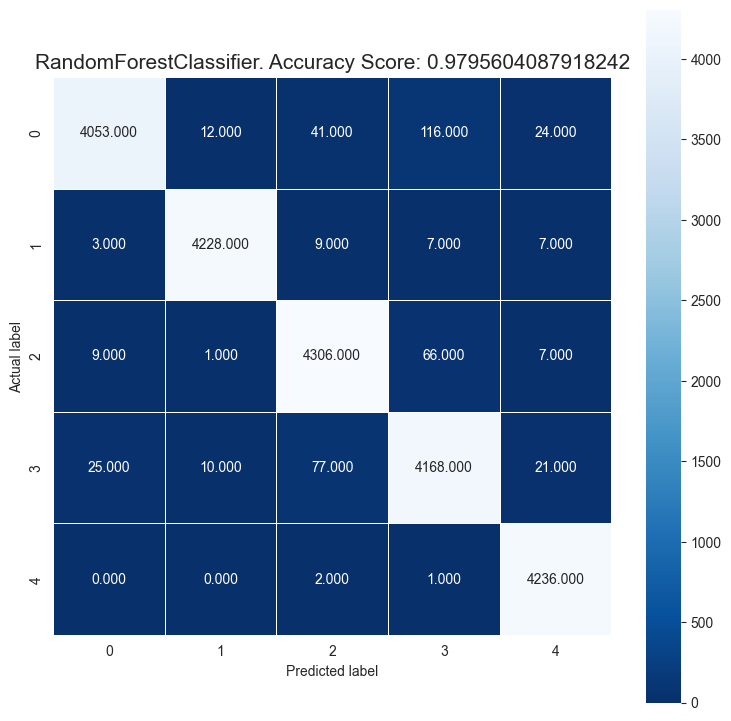

LogisticRegression
>acc=0.843, cfg={'solver': 'newton-cg', 'max_iter': 177.8894472361809, 'C': 5.714328571428571}
Accuracy: 0.843 
normal accuracy: 0.8808290155440415
suicidal accuracy: 0.9268923366243536
prodigal accuracy: 0.8188653451811346
greedy accuracy: 0.7361078818879331
suicidal and prodigal accuracy 0.8560981363529134
4246 4254 4389 4301 4239
false negative: 0.022166223342199823


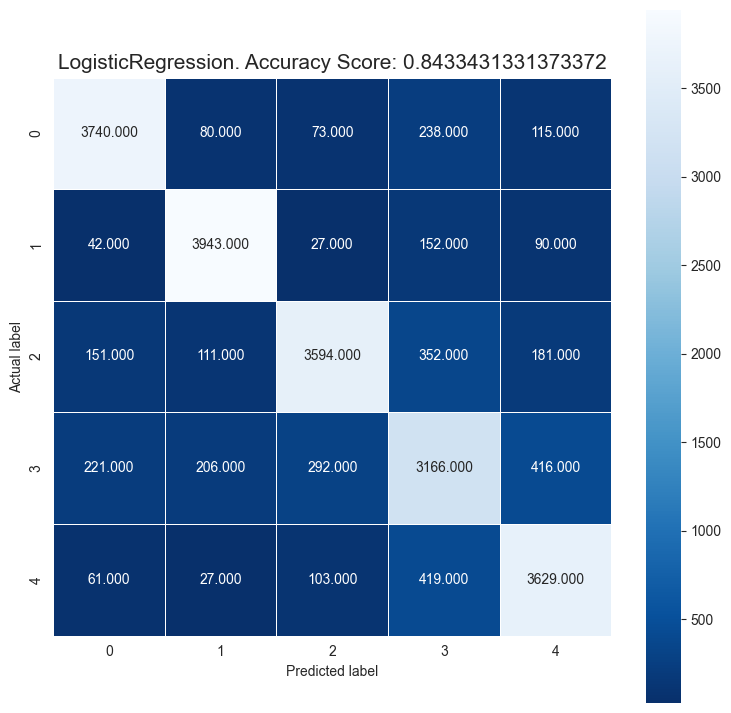

DecisionTreeClassifier
>acc=0.957, cfg={'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'entropy'}
Accuracy: 0.957 
normal accuracy: 0.9498351389543099
suicidal accuracy: 0.9858956276445698
prodigal accuracy: 0.9432672590567327
greedy accuracy: 0.9244361776331086
suicidal and prodigal accuracy 0.9839584807737674
4246 4254 4389 4301 4239
false negative: 0.007606514536375939


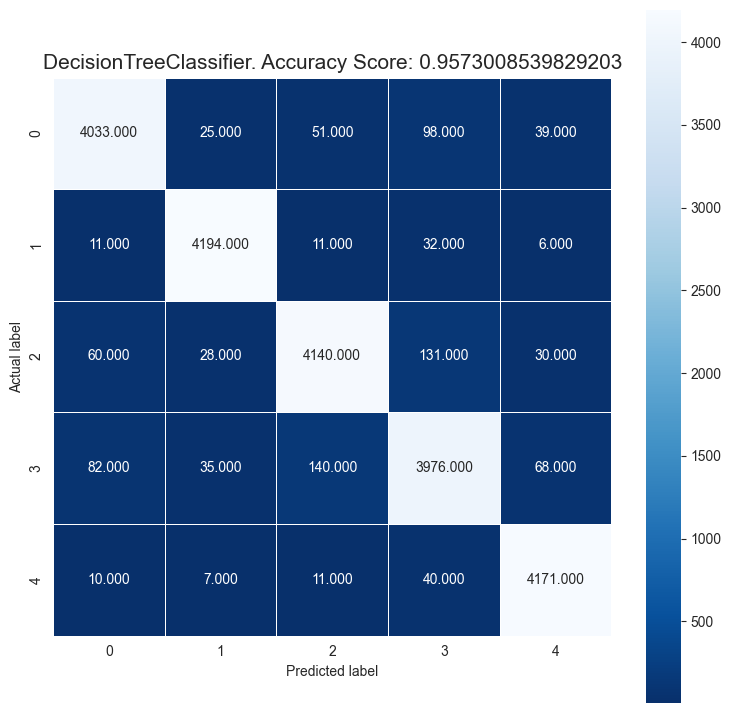

MLPClassifier
>acc=0.987, cfg={'solver': 'adam', 'max_iter': 65, 'hidden_layer_sizes': 234}
Accuracy: 0.987 
normal accuracy: 0.9587847385774847
suicidal accuracy: 0.999529854254819
prodigal accuracy: 0.9943039416723627
greedy accuracy: 0.9837247151825157
suicidal and prodigal accuracy 0.998348667138476
4246 4254 4389 4301 4239
false negative: 0.002893275467823977


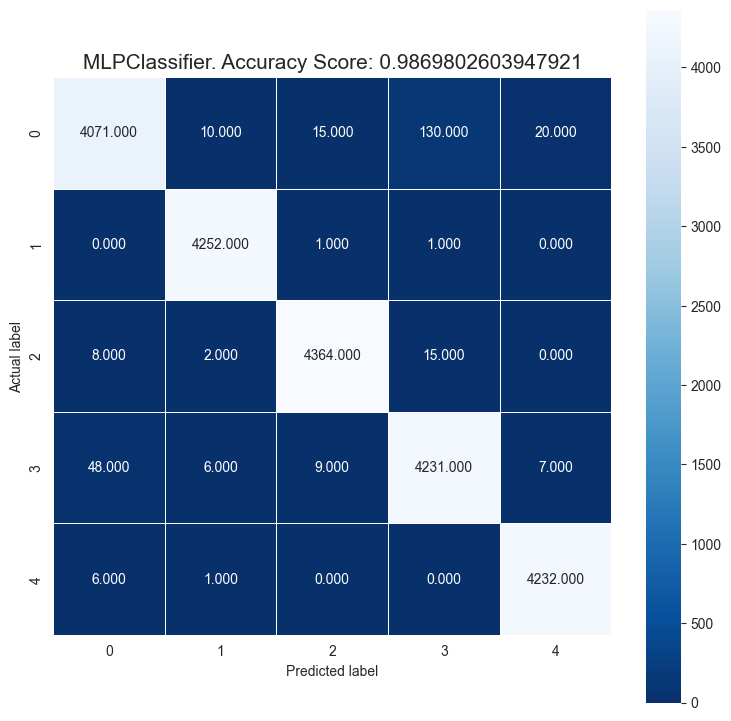

KNeighborsClassifier
>acc=0.986, cfg={'weights': 'distance', 'n_neighbors': 1, 'algorithm': 'ball_tree'}
Accuracy: 0.986 
normal accuracy: 0.9463024022609515
suicidal accuracy: 1.0
prodigal accuracy: 0.998177261335156
greedy accuracy: 0.9893048128342246
suicidal and prodigal accuracy 0.9969332389714556
4246 4254 4389 4301 4239
false negative: 0.0007933174669839937


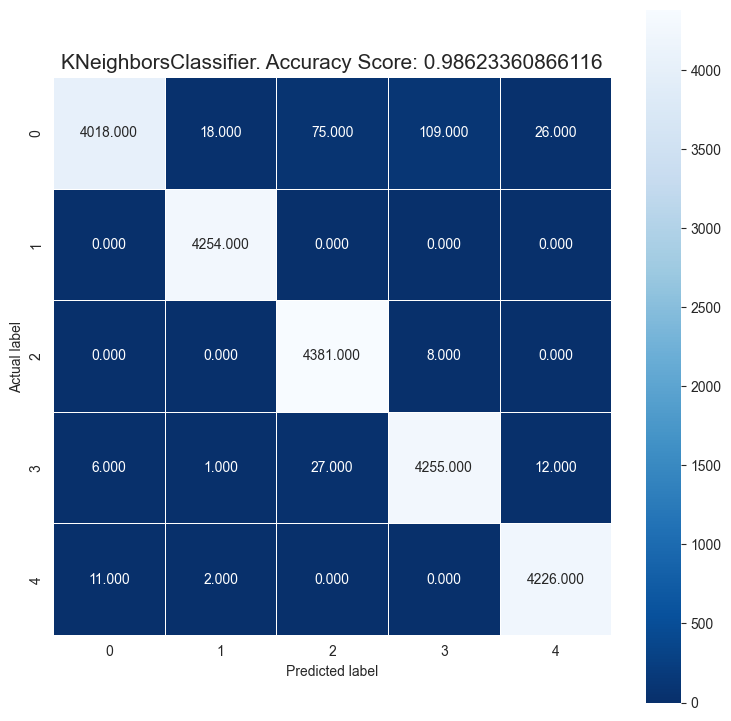

In [80]:
df_report_2 = pd.DataFrame()

df_report_2 = xval_test(reg_RF, space_rf, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_lin, space_lr, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_DT, space_dt, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_MLP, space_mlp, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_KN, space_kn, df_report_2, df_train, y_train, df_test, y_test)


In [81]:
df_report_2

,Accuracy,F1,Precision,Recall,Balanced Acc,params
RandomForestClassifier,0.979560,0.979544,0.979708,0.979560,0.979578,"{'n_estimators': 9, 'max_features': 26, 'max_d..."
LogisticRegression,0.843343,0.843310,0.843945,0.843343,0.843759,"{'solver': 'newton-cg', 'max_iter': 177.889447..."
DecisionTreeClassifier,0.957301,0.957222,0.957201,0.957301,0.957479,"{'max_features': 'sqrt', 'max_depth': 25, 'cri..."
MLPClassifier,0.986980,0.986953,0.987029,0.986980,0.986938,"{'solver': 'adam', 'max_iter': 65, 'hidden_lay..."
KNeighborsClassifier,0.986234,0.986151,0.986396,0.986234,0.986144,"{'weights': 'distance', 'n_neighbors': 1, 'alg..."


SVC
>acc=0.989, cfg={'kernel': 'rbf', 'C': 9.0453216080402}
Accuracy: 0.989 
normal accuracy: 0.9618464437117287
suicidal accuracy: 0.9997649271274095
prodigal accuracy: 0.9972658920027341
greedy accuracy: 0.9858172518019065
suicidal and prodigal accuracy 0.9997640953054966
4246 4254 4389 4301 4239
false negative: 0.0020999580008399833


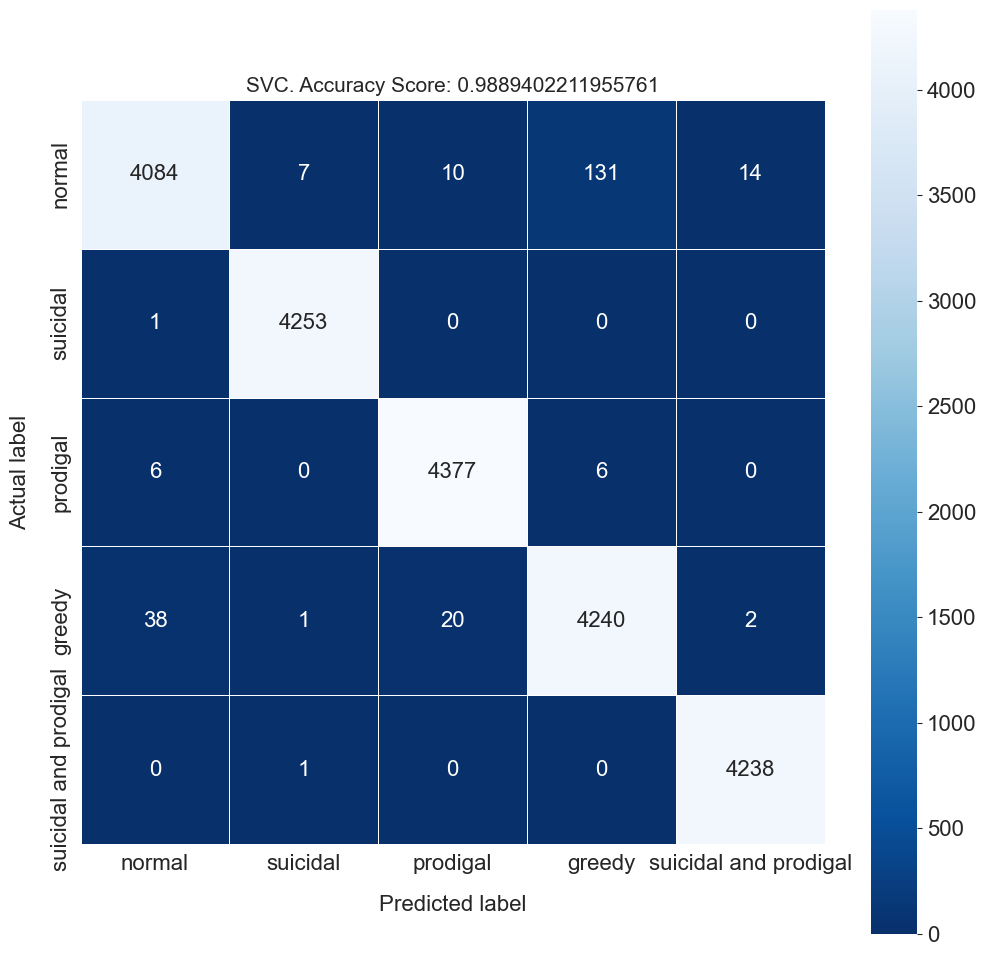

In [87]:
df_report_2 = xval_test(reg_SVC, space_svc, df_report_2, df_train, y_train, df_test, y_test)

In [83]:
df_report_2

,Accuracy,F1,Precision,Recall,Balanced Acc,params
RandomForestClassifier,0.979560,0.979544,0.979708,0.979560,0.979578,"{'n_estimators': 9, 'max_features': 26, 'max_d..."
LogisticRegression,0.843343,0.843310,0.843945,0.843343,0.843759,"{'solver': 'newton-cg', 'max_iter': 177.889447..."
DecisionTreeClassifier,0.957301,0.957222,0.957201,0.957301,0.957479,"{'max_features': 'sqrt', 'max_depth': 25, 'cri..."
MLPClassifier,0.986980,0.986953,0.987029,0.986980,0.986938,"{'solver': 'adam', 'max_iter': 65, 'hidden_lay..."
KNeighborsClassifier,0.986234,0.986151,0.986396,0.986234,0.986144,"{'weights': 'distance', 'n_neighbors': 1, 'alg..."
SVC,0.988847,0.988822,0.988908,0.988847,0.988798,"{'kernel': 'rbf', 'C': 6.733994974874372}"
